# Cleaned excel to linear data stream

In [ ]:
rainlist=[]
import openpyxl

# Load the workbook
workbook = openpyxl.load_workbook('/content/toplay.xlsx')

# Loop through each sheet from 1955 to 2019
for year in range(1955, 2020):
    sheet_name = str(year)
    sheet = workbook[sheet_name]

    # Loop through each column in the sheet
    for col in range(1, sheet.max_column + 1):
        # Loop through each row in the column
        for row in range(1, sheet.max_row + 1):
            # Add the integer to a list
            value = sheet.cell(row=row, column=col).value
            if value is not None:
                # Add the integer to a list
                rainlist.append(value)

In [ ]:
len(rainlist)

23741

# Generating dates and putting them together to form timeseries dataset

In [ ]:
from datetime import date, timedelta

start_date = date(1955, 1, 1)
end_date = date(2019, 12, 31)

delta = timedelta(days=1)
dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%d-%b-%Y"))
    start_date += delta

In [ ]:
len(dates)

23741

concatenating the lists to dataframe

In [ ]:
import pandas as pd

# Create a dataframe with the dates and my_list as columns
concatrain = pd.DataFrame({'Date': dates, 'rain': rainlist})

In [ ]:
concatrain.to_excel('concatrain.xlsx', index=False)

# The Actual Analysis

In [ ]:
from datetime import date, timedelta

In [ ]:
import datetime as dt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/concatrain.xlsx')
df.head()

,Date,rain
0,01-Jan-1955,0
1,02-Jan-1955,0
2,03-Jan-1955,0
3,04-Jan-1955,0
4,05-Jan-1955,0


In [ ]:
df['Date']=df["Date"].astype("datetime64")
df_ann = df.set_index("Date")
df_ann.head()

,rain
Date,
1955-01-01,0
1955-01-02,0
1955-01-03,0
1955-01-04,0
1955-01-05,0


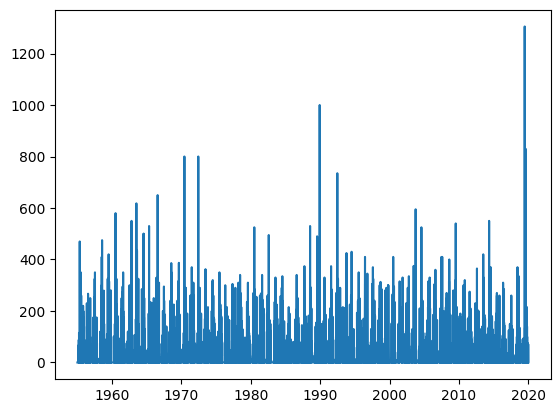

In [ ]:
plt.plot(df_ann['rain'])

In [ ]:
df_ann.head()

,rain,Year
Date,,
1955-01-01,0,NaN
1955-01-02,0,NaN
1955-01-03,0,NaN
1955-01-04,0,NaN
1955-01-05,0,NaN


In [ ]:
years_ann=list(df['Date'].dt.year)

In [ ]:
df_ann.head()

,rain,Year
Date,,
1955-01-01,0,1955
1955-01-02,0,1955
1955-01-03,0,1955
1955-01-04,0,1955
1955-01-05,0,1955


In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'rain'}, xlabel='Year'>

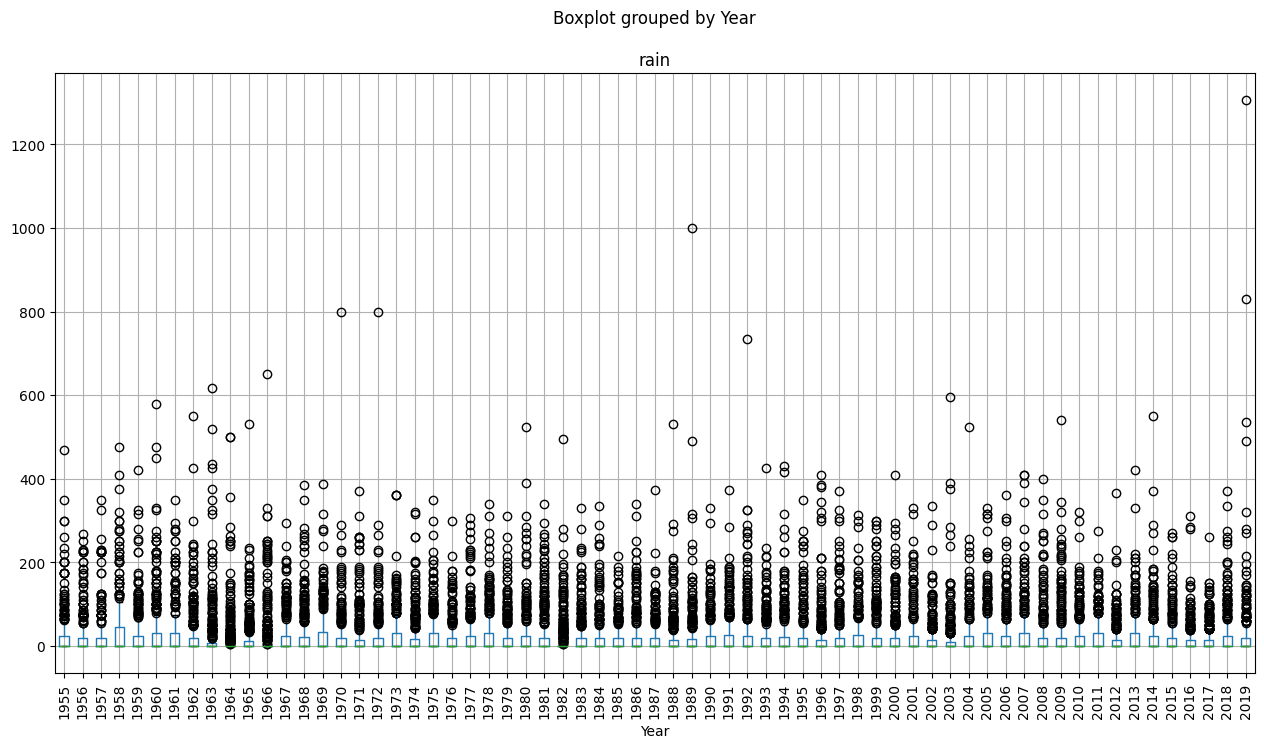

In [ ]:
df_ann.boxplot(column='rain',by='Year',figsize=(15,8),rot=90)

# Using ARIMA

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
df_ar.to_excel('df_linear.xlsx', index=True)

In [ ]:
df=pd.read_excel('/content/df_linear.xlsx')
df.head()

,Date,rain
0,1955-01-01,0
1,1955-01-02,0
2,1955-01-03,0
3,1955-01-04,0
4,1955-01-05,0


In [ ]:
df.head()

,rain
Date,
1955-01-01,0
1955-01-02,0
1955-01-03,0
1955-01-04,0
1955-01-05,0


In [ ]:
df_ar=df

In [ ]:
train_df = df_ar[:'2018-12-31']
test_df = df_ar['2019-01-01':]

In [ ]:
model = sm.tsa.arima.ARIMA(train_df['rain'], order=(1,1,365))
model_fit = model.fit()

forming predictions on test df

In [ ]:
forecast = model_fit.predict(start='2019-01-01', end='2019-12-31')

In [ ]:
mse = ((forecast - test_df['rain'])**2).mean()
print('Mean squared error:', mse)

Mean squared error: 10133.56336359797


different train test split

In [ ]:
train_df2 = df_ar[:'2019-12-31']
test_df2 = df_ar['2019-01-01':]

In [ ]:
model2 = sm.tsa.arima.ARIMA(train_df2['rain'], order=(1,1,1))
model_fit2 = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_2 = model_fit.predict(start='2019-01-01', end='2019-12-31')

In [ ]:
mse = ((forecast_2 - test_df2['rain'])**2).mean()
print('Mean squared error:', mse)

Mean squared error: 10133.56336359797


In [ ]:
forecast_2['2019-06-01':'2019-09-01']

2019-06-01    0.214084
2019-06-02    0.214084
2019-06-03    0.214084
2019-06-04    0.214084
2019-06-05    0.214084
                ...   
2019-08-28    0.214084
2019-08-29    0.214084
2019-08-30    0.214084
2019-08-31    0.214084
2019-09-01    0.214084
Freq: D, Name: predicted_mean, Length: 93, dtype: float64

trying on monsoon data only.

In [ ]:
train_monsoon = df_ar['2019-06-1':'2019-08-31']
test_monsoon = df_ar['2019-08-01':'2019-08-14']

In [ ]:
model_monsoon = sm.tsa.arima.ARIMA(train_monsoon['rain'], order=(1,1,3))
model_monsoonfit = model_monsoon.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_monsoon = model_monsoonfit.predict(start='2019-08-01', end='2019-08-14')

In [ ]:
forecast_monsoon

2019-08-01     25.615352
2019-08-02     22.160452
2019-08-03     24.717522
2019-08-04     25.935258
2019-08-05     58.335808
2019-08-06     71.708557
2019-08-07    134.713651
2019-08-08    148.995394
2019-08-09    217.266433
2019-08-10    262.257589
2019-08-11    366.748054
2019-08-12    254.929988
2019-08-13    126.663979
2019-08-14     82.218178
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
mse = ((forecast_monsoon - test_monsoon['rain'])**2).mean()
mse

50174.23810158176

on larger data, updated pdq, with two years training

In [ ]:
from google.colab import drive

In [ ]:
train_df = df_ar['2017-01-01':'2018-12-31']
test_df = df_ar['2019-01-01':'2019-12-31']

model = sm.tsa.arima.ARIMA(train_df['rain'], order=(1,1,30))
model_fit = model.fit()

#model_fit.download('/content/drive/arima_on30')
forecast = model_fit.predict(start='2019-01-01', end='2019-12-31')

mse = ((forecast - test_df['rain'])**2).mean()
print('Mean squared error:', mse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean squared error: 10226.694720155167


In [ ]:
forecast

2019-01-01    0.271335
2019-01-02    0.348357
2019-01-03    0.425170
2019-01-04    0.468466
2019-01-05    0.492871
                ...   
2019-12-27    0.524397
2019-12-28    0.524397
2019-12-29    0.524397
2019-12-30    0.524397
2019-12-31    0.524397
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

# Interim Final Model test

In [ ]:
train_df = df_ar[:'2017-12-31']
test_df = df_ar['2018-06-23':'2018-06-30']

model = sm.tsa.arima.ARIMA(train_df['rain'], order=(1,1,365))
model_fit = model.fit()

#model_fit.download('/content/drive/arima_on30')
resweek = model_fit.predict(start='2018-06-18', end='2018-06-25')

In [ ]:
testweek = df_ar['2018-06-23':'2018-06-30']

In [ ]:
test_df = df_ar['2018-06-18':'2018-06-25']
forecast=resweek

In [ ]:
res=forecast['rain'].tolist()

In [ ]:
len(test_df['rain'])

8

In [ ]:
len(res)

8

In [ ]:
testinglist=test_df['rain'].tolist()
type(testinglist)

list

In [ ]:
type(res)

list

In [ ]:
sumdiff=0
for rain1,rain2 in zip(res,testinglist):
  sumdiff=sumdiff+((rain1-rain2))

In [ ]:
avgdiff=sumdiff/8
avgdiff

-6.25

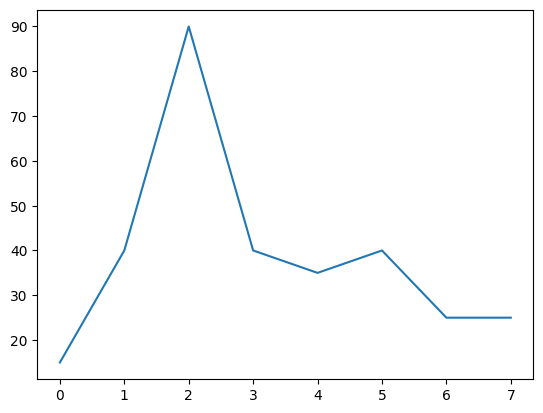

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res)

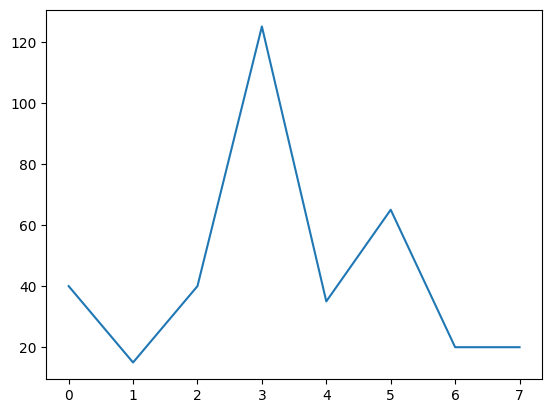

In [ ]:
plt.plot(testinglist)